In [3]:
import igl
import numpy as np
import networkx as nx
import drawSvg as draw
# from meshplot import plot

def add_edges_from_mesh(graph, faces):
    face_adjacency_matrix, _ = igl.triangle_triangle_adjacency(faces)
    for face_id, _ in enumerate(faces):
        for ajd_face_id in face_adjacency_matrix[face_id]:
            graph.add_edge(face_id,ajd_face_id)

# adds nodes to graph G for every face in mesh
def add_nodes_from_mesh(graph, faces): [graph.add_node(face_id) for face_id, face in enumerate(faces)]

# create networkx graph from given mesh
def graph_from_mesh(faces):
    graph = nx.Graph()
    add_nodes_from_mesh(graph, faces)
    add_edges_from_mesh(graph, faces)
    return graph

# returns a rotation matrix from a (unnormalized) axis and an angle
def get_rotation_matrix(axis, angle):
    from scipy.spatial.transform import Rotation
    return Rotation.from_rotvec(axis/np.linalg.norm(axis) * angle).as_matrix()

# returns a matrix that maps 3D space onto a 2D plane (the orientation of which is specified by 'face_normal').
def get_2d_projection(face_normal):
    xy_plane_normal = np.array([0,0,1])  # aka 'the z-axis'
    rotation_axis = np.cross(face_normal, xy_plane_normal)
    angle = np.arccos(np.clip(np.dot(xy_plane_normal, face_normal), -1.0, 1.0))

    discard_z_matrix = np.array([
        [1, 0, 0],
        [0, 1, 0]
    ])

    rotation_matrix = get_rotation_matrix(rotation_axis, angle)
    return discard_z_matrix.dot(rotation_matrix)


In [4]:
# load mesh
raw_vertices, raw_faces = igl.read_triangle_mesh("cube.stl")
vertices, faces, _ = igl.remove_duplicates(raw_vertices, raw_faces, 0.00001)


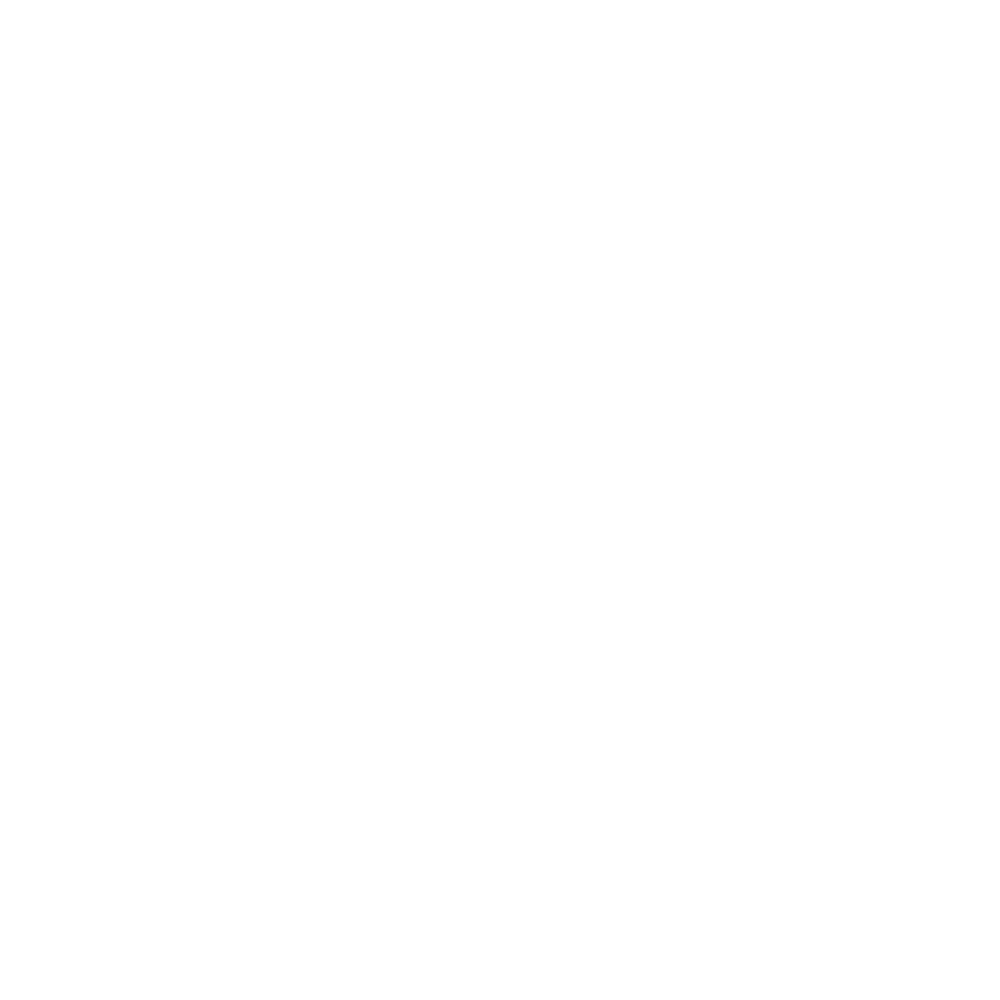

In [6]:
# find commone edge of two adjacent faces
def find_common_edge(faces, face_id_a, face_id_b):
    # make sure that the resulting vertex ids are clockwise wrt. source face
    face_vertex_array_a = faces[face_id_a]
    face_vertex_array_b = faces[face_id_b]

    for i in range(3):
        if face_vertex_array_a[i] in face_vertex_array_b and face_vertex_array_a[(i+1) % 3] in face_vertex_array_b:
            return (face_vertex_array_a[i], face_vertex_array_a[(i+1) % 3])

    return None

def get_face_normal(vertices, faces, face_id):
    face_normals = igl.per_face_normals(vertices, faces, np.ones((1, 3)))
    return face_normals[face_id]

# get angle between the normals of two faces
def dihedral_angle(vertices, faces, face_a_id, face_b_id):
    face_normals = igl.per_face_normals(vertices, faces, np.ones((1, 3)))
    return np.arccos(np.clip(np.dot(face_normals[face_a_id], face_normals[face_b_id]), -1.0, 1.0))


polygons = []

face_normals = igl.per_face_normals(vertices, faces, np.ones((1, 3)))
#face_coordinates =  TODO get the vertices of face 0

# TODO use get_2d_projection(face_normals) get rotation matrix for face 0
# TODO use “.dot” to multiply the rotation matrix with each vertex in face_coordinates

#TODO remove comment from line below 
polygons.append(face_coordinates)

# generate svg visualization
drawing = None
drawing = draw.Drawing(1000, 1000, origin='center')
for polygon in polygons:
    # polygon = [coords[0:2] for coords in polygon]
    drawing.append(draw.Lines(*np.array(polygon).flatten()*50,
                   close=True, fill='#eeee00', stroke='#000', stroke_width=.1))

drawing
